In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1     ✔ purrr   0.2.5
✔ tibble  2.1.1     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [78]:
dane <- read_csv("http://if.pwr.edu.pl/~mjarema/data1.csv")

Warning message:
“Missing column names filled in: 'X1' [1]”Parsed with column specification:
cols(
  X1 = col_integer(),
  y = col_double()
)


In [79]:
head(dane)
tail(dane)

X1,y
1,-0.027144884
2,-0.009302717
3,0.034567390
4,0.019761352
5,-0.012864805
6,0.029861776


X1,y
67,0.085404112
68,0.067442972
69,0.009053299
70,-0.049232800
71,-0.106394061
72,-0.058876434


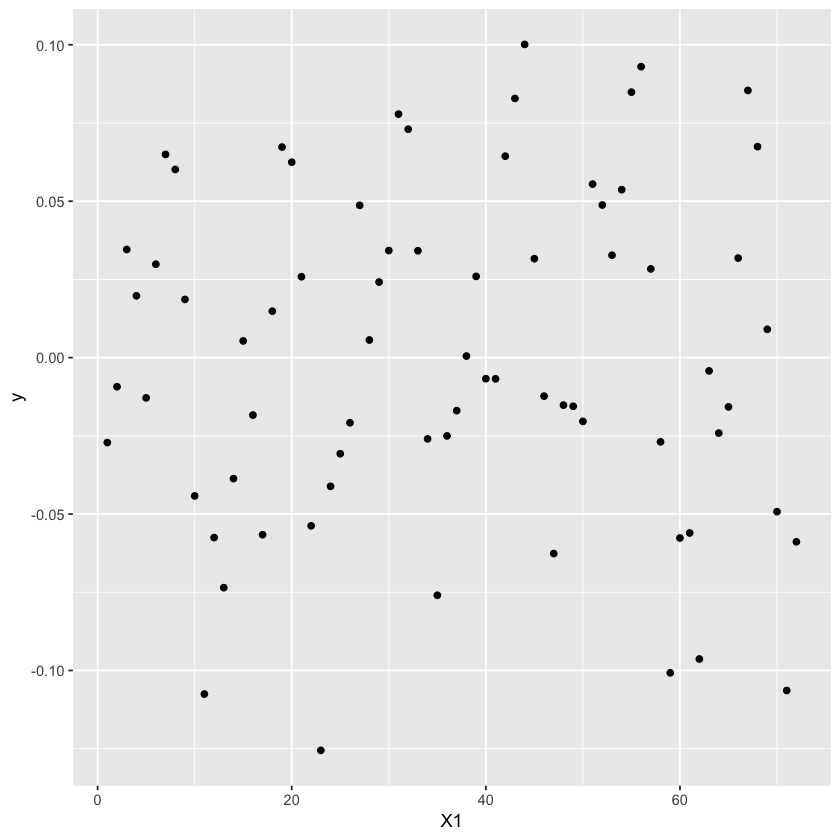

In [80]:
ggplot() + geom_point(data = dane, aes(X1, y))

In [81]:
ft <- fft(dane$y)

In [82]:
ft.mod <- Mod(ft)

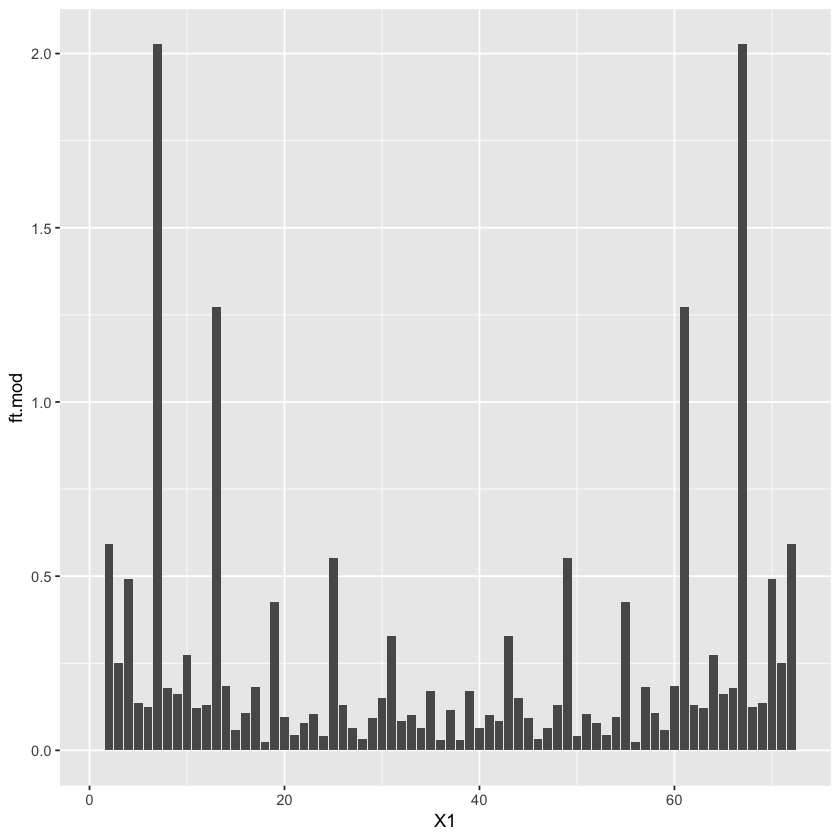

In [83]:
ggplot() + geom_col(data = dane, aes(X1, ft.mod))

In [84]:
max(ft.mod)
head(ft.mod, 10)
print(ft.mod[1])

[1] 2.026182

[1] 1.443290e-15 5.926340e-01 2.520052e-01 4.923964e-01 1.352214e-01
 [6] 1.247680e-01 2.026182e+00 1.797175e-01 1.629970e-01 2.726813e-01

[1] 1.44329e-15


In [85]:
# highest pick are in ft.mod[7] ft.mod[13] ft.mod[61] and ft.mod[67]

In [86]:
# ft2 <- matrix(0,1,length(ft))
ft2 <- rep(0, times=length(ft))

In [87]:
ft2[7] <- ft[7]
ft2[13] <- ft[13]
ft2[61] <- ft[61]
ft2[67] <- ft[67]
head(ft2, 10)
head(ft, 10)

[1]  0.000000+0.000000i  0.000000+0.000000i  0.000000+0.000000i
 [4]  0.000000+0.000000i  0.000000+0.000000i  0.000000+0.000000i
 [7] -1.920609-0.645502i  0.000000+0.000000i  0.000000+0.000000i
[10]  0.000000+0.000000i

[1]  1.443290e-15+0.000000e+00i -4.872492e-01+3.373474e-01i
 [3]  1.534859e-01-1.998717e-01i  3.975473e-01-2.905345e-01i
 [5]  1.097243e-01+7.902787e-02i -7.095926e-02+1.026248e-01i
 [7] -1.920609e+00-6.455016e-01i -1.165848e-01-1.367712e-01i
 [9]  1.224332e-01-1.076018e-01i -4.023084e-02-2.696972e-01i

In [88]:
ft2.mod <- Mod(ft2)

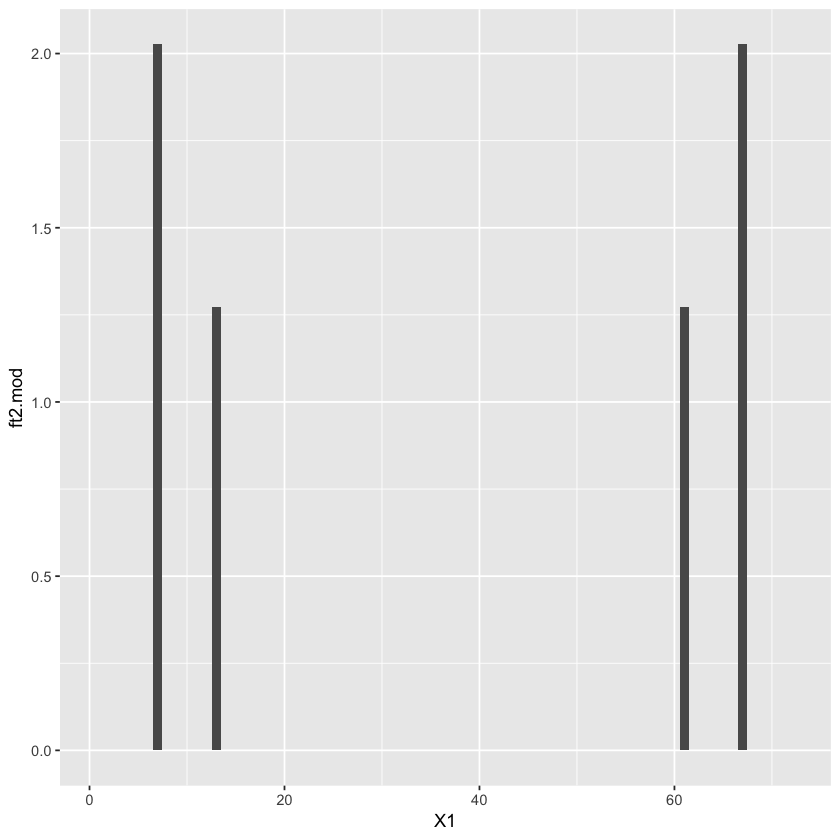

In [89]:
ggplot() + geom_col(data = dane, aes(X1, ft2.mod))

[1] -0.033814938+0i -0.001946745+0i  0.004608542-0i -0.001604717-0i
[5]  0.006912851-0i  0.039412660-0i

[1] 1.299922e-17

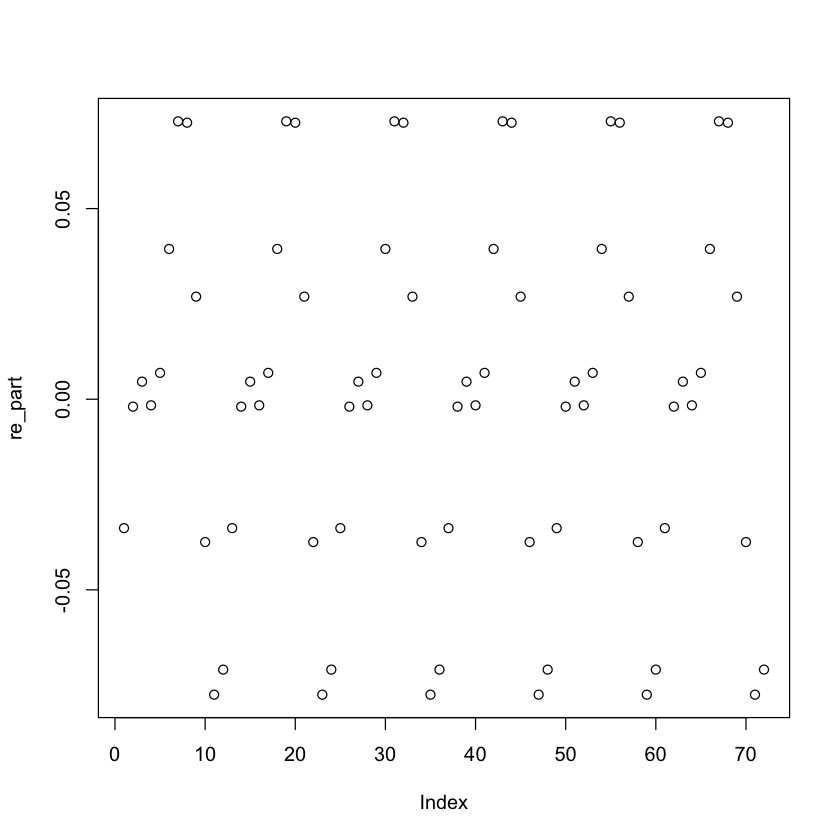

In [91]:
fft2.inv <- fft(ft2, inverse = TRUE)
fft2.inv.divided <- fft2.inv/length(fft2.inv)
head(fft2.inv.divided)
max(Im(fft2.inv.divided))

re_part <- Re(fft2.inv.divided)

plot(re_part)